In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/recipe-sampled-0-25/sampled_dataset.csv')

In [3]:
titles = df['title'].dropna().astype(str)
print(len(titles))

557658


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [5]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(titles)

In [6]:
inertia = []
k_values = list(range(2, 50))

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


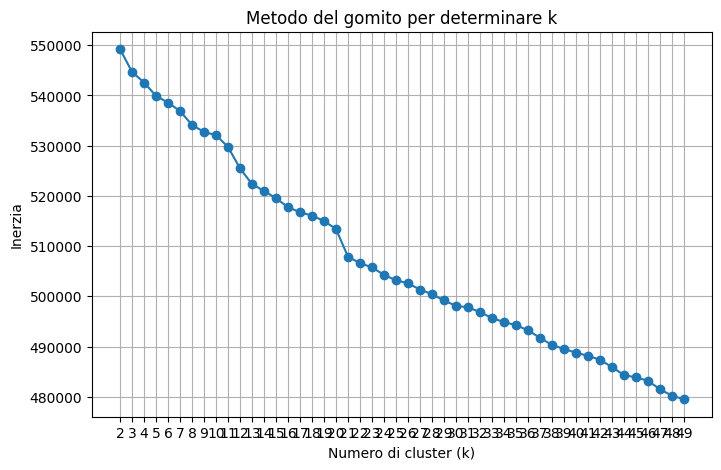

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Metodo del gomito per determinare k')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Inerzia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

It seems that two interesting values for K are 13 and 21, let's try both of them.

In [8]:
n_clusters = 13
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(X)

# Aggiungi i cluster al dataframe originale
df['cluster'] = kmeans.labels_

# Mostra un esempio di titoli raggruppati per cluster
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    print(df[df['cluster'] == i]['title'].head(5).to_string(index=False))


Cluster 0:
                   Pol Martin Scrambled Eggs Magda
         Crispy Parmesan Polenta With Poached Eggs
Skillet Eggs With Tomatoes, Parmigiano-Reggiano...
         Spiced Coconut Lentils with Peppered Eggs
                            Poached Eggs In Catsup

Cluster 1:
      French Chicken Stew
          Moms Pie Dough 
          Nutty Butty Pie
    Extra Flaky Pie Crust
Puerto Rican Chicken Soup

Cluster 2:
             Pretzel Salad Or Dessert
Crab, Grapefruit And Watercress Salad
                      Vegetable Salad
               Russian Salad Dressing
            Rice And Asparagus Salad 

Cluster 3:
         Barbecued Beef Brisket Recipe
Beef Stew With Potatoes, Spanish Style
              Easy cheese and beef dip
                Deli Corned Beef Bites
              Classic Beef Wellingtons

Cluster 4:
                   Marinated Flank Steak Recipe
                           Chinese Pepper Steak
Tex-Mex Steak Calzones (Sandwich) Pizza Pockets
                          

In [9]:
# Get the centroid for the first cluster
centroid = kmeans.cluster_centers_[0]

# Sort terms according to their weights
# (argsort goes from lowest to highest, we reverse the order through slicing)
sorted_terms = centroid.argsort()[::-1]

# Print out the top 10 terms for the cluster
[titles[j] for j in sorted_terms[:20]]

['Dirt Cake',
 'Hummingbird Cake',
 'Snowman Cups',
 'Delicious Beef',
 'Low-Fat Baked Chicken(Heart Healthy)  ',
 'Butter Cake',
 "World's Best Beer Margarita's",
 'Kichadi',
 'Kassler Chops With Remoulade',
 'Green Bean Salad With Creamy Dressing',
 'Mashed Rutabagas And Potatoes',
 'Arugula Soup Related Story',
 'Turkey Tetrazzini',
 'Diabetic Turkey Patties',
 "Loretta's Frozen Dessert",
 'Banana Split Cake',
 'Prune Cake',
 'Summer Fresh Spinach Salad',
 'Crock Pot Yogurt',
 'Peanut Butter Fudge']

In [10]:
n_clusters = 21
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(X)

# Aggiungi i cluster al dataframe originale
df['cluster'] = kmeans.labels_

# Mostra un esempio di titoli raggruppati per cluster
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    print(df[df['cluster'] == i]['title'].head(5).to_string(index=False))


Cluster 0:
                   Pol Martin Scrambled Eggs Magda
         Crispy Parmesan Polenta With Poached Eggs
Skillet Eggs With Tomatoes, Parmigiano-Reggiano...
         Spiced Coconut Lentils with Peppered Eggs
                            Poached Eggs In Catsup

Cluster 1:
                 Moms Pie Dough 
                 Nutty Butty Pie
           Extra Flaky Pie Crust
Chicken With Mango And Asparagus
                       Smore Pie

Cluster 2:
                         Sloppy Joe Grilled Cheese
                             Cinnamon Cheese Toast
Balsamic Brussels Sprouts With Feta Cheese And ...
                  Grandma'S Cheese Balls W/Olives 
                                   Cheese Broccoli

Cluster 3:
         Marinated Flank Steak Recipe
                       Glazed Carrots
                         Citrus Syrup
Cranberry And Candied Orange Chutney 
Tau Kua He Ci Medan'S Favourite Food 

Cluster 4:
                               Stuffed Mushrooms
     Simple Stuffed Shells

In [11]:
# Get the centroid for the first cluster
centroid = kmeans.cluster_centers_[0]

# Sort terms according to their weights
# (argsort goes from lowest to highest, we reverse the order through slicing)
sorted_terms = centroid.argsort()[::-1]

# Print out the top 10 terms for the cluster
[titles[j] for j in sorted_terms[:20]]

['Dirt Cake',
 'Hummingbird Cake',
 'Snowman Cups',
 'Delicious Beef',
 'Low-Fat Baked Chicken(Heart Healthy)  ',
 'Butter Cake',
 "World's Best Beer Margarita's",
 'Kassler Chops With Remoulade',
 'Green Bean Salad With Creamy Dressing',
 'Mashed Rutabagas And Potatoes',
 'Kichadi',
 'Arugula Soup Related Story',
 'Turkey Tetrazzini',
 'Diabetic Turkey Patties',
 "Loretta's Frozen Dessert",
 'Banana Split Cake',
 'Prune Cake',
 'Summer Fresh Spinach Salad',
 'Crock Pot Yogurt',
 'Peanut Butter Fudge']

In [12]:
print("Top terms per cluster:")
vocab = vectorizer.get_feature_names_out()

for i in range(kmeans.n_clusters):
    centroid = kmeans.cluster_centers_[i]
    sorted_terms = centroid.argsort()[::-1]
    print(f"Cluster {i}:\t{[vocab[j] for j in sorted_terms[:5]]}")

Top terms per cluster:
Cluster 0:	['eggs', 'deviled', 'scrambled', 'pickled', 'baked']
Cluster 1:	['chicken', 'pie', 'pecan', 'lemon', 'pot']
Cluster 2:	['cheese', 'ball', 'cream', 'macaroni', 'goat']
Cluster 3:	['recipe', 'chocolate', 'beef', 'rice', 'pork']
Cluster 4:	['stuffed', 'peppers', 'mushrooms', 'shells', 'chicken']
Cluster 5:	['fruit', 'muffins', 'salad', 'bran', 'blueberry']
Cluster 6:	['casserole', 'chicken', 'broccoli', 'potato', 'rice']
Cluster 7:	['dip', 'spinach', 'artichoke', 'cheese', 'hot']
Cluster 8:	['peanut', 'butter', 'cookies', 'chocolate', 'fudge']
Cluster 9:	['soup', 'potato', 'vegetable', 'bean', 'chicken']
Cluster 10:	['cake', 'chocolate', 'pound', 'apple', 'carrot']
Cluster 11:	['sauce', 'barbecue', 'spaghetti', 'tomato', 'chicken']
Cluster 12:	['dollar', 'million', 'pie', 'fudge', 'pound']
Cluster 13:	['cream', 'ice', 'sour', 'pie', 'cake']
Cluster 14:	['french', 'toast', 'onion', 'soup', 'bread']
Cluster 15:	['easy', 'chicken', 'quick', 'pie', 'cake']
Cl

In [13]:
print('Number of docs in: ')

for i in range(kmeans.n_clusters):
    print(f"Cluster {i}: {np.sum(kmeans.labels_ == i)}")

Number of docs in: 
Cluster 0: 2531
Cluster 1: 48292
Cluster 2: 16528
Cluster 3: 281323
Cluster 4: 5854
Cluster 5: 10729
Cluster 6: 20671
Cluster 7: 10226
Cluster 8: 8258
Cluster 9: 16404
Cluster 10: 26620
Cluster 11: 16723
Cluster 12: 225
Cluster 13: 9695
Cluster 14: 2972
Cluster 15: 9810
Cluster 16: 14755
Cluster 17: 5348
Cluster 18: 3625
Cluster 19: 15076
Cluster 20: 31993


### Evaluation

In order to evaluate our clustering we are using only intrinsic method, since we do not have the real labels of the clusters.

In [14]:
from sklearn import metrics

print("Intrinsic evaluation measures:")
print("Within-cluster sum-of-squares:", str(kmeans.inertia_))
#print("Silhouette coefficient:", str(metrics.silhouette_score(X, kmeans.labels_)))

Intrinsic evaluation measures:
Within-cluster sum-of-squares: 507911.4189022362


Since the dataset is quite big, even reducing it to a quarter of the original, we try to perform also a Mini Batch Clustering.

In [15]:
from sklearn.cluster import MiniBatchKMeans

n_clusters = 21
mb_kmeans = MiniBatchKMeans(n_clusters=n_clusters,batch_size=500, random_state=2307)
mb_kmeans.fit(X)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(batch_size=500, n_clusters=21, random_state=2307)

In [16]:
print("Intrinsic evaluation measures:")
print("Within-cluster sum-of-squares:", str(mb_kmeans.inertia_))
#print("Silhouette coefficient:", str(metrics.silhouette_score(X, mb_kmeans.labels_)))

Intrinsic evaluation measures:
Within-cluster sum-of-squares: 509374.4754996094


In [17]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(3)
reduced_data = svd.fit_transform(X)

[x,y,z] = np.transpose(reduced_data)
[x,y,z]

[array([0.03346158, 0.23796595, 0.00754943, ..., 0.02974693, 0.00773994,
        0.04648384]),
 array([ 0.02158618, -0.04479014,  0.00449034, ...,  0.01294043,
         0.00084584,  0.02750924]),
 array([ 0.01110142,  0.0066511 ,  0.00080566, ..., -0.00403351,
        -0.00134537, -0.01740402])]

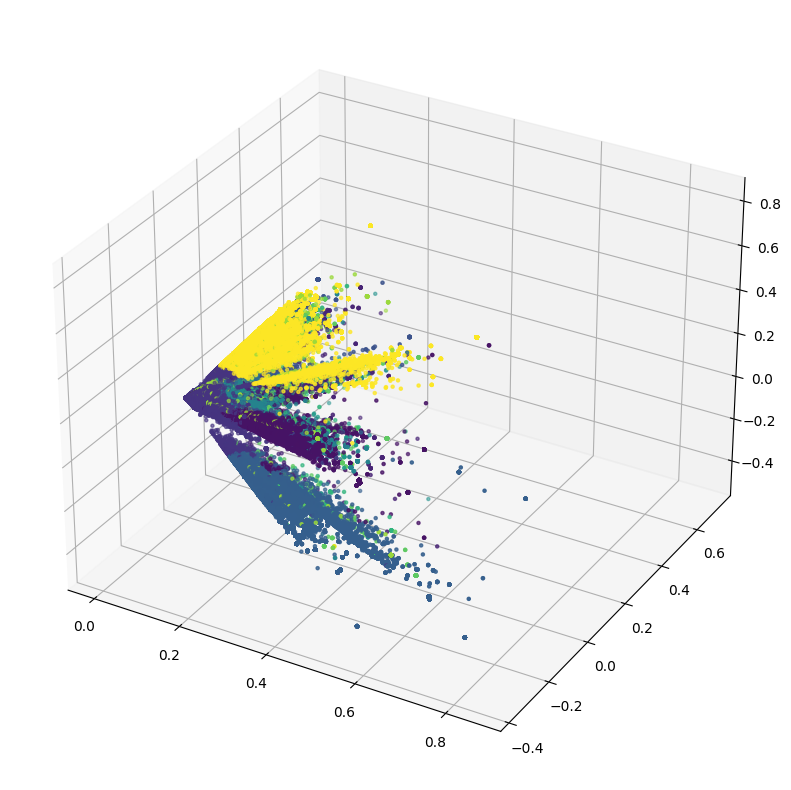

In [18]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=kmeans.labels_, marker='.');